In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./income_cleaned.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [167]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Jobless', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [168]:
workclass_map={"State-gov":1,"Self-emp-not-inc":2,"Private":3,"Federal-gov":4,"Local-gov":5,"Jobless":6,"Self-emp-inc":7,"Without-pay":8,"Never-worked":9}

In [169]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [170]:
marital_map={"Never-married":1,"Married-civ-spouse":2,"Divorced":3,"Married-spouse-absent":4,"Separated":5,"Married-AF-spouse":6,"Widowed":7}

In [171]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [172]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [173]:
relationship_map={"Not-in-family":1,"Husband":2,"Wife":3,"Own-child":4,"Unmarried":5,"Other-relative":6}

In [174]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [175]:
race_map={"White":1,"Black":2,"Asian-Pac-Islander":3,"Amer-Indian-Eskimo":4,"Other":5}

In [176]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [177]:
# label encoding...
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['native-country'] = le.fit_transform(df['native-country'])
df['occupation'] = le.fit_transform(df['occupation'])


In [178]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,38,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,38,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,38,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,38,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,4,<=50K


In [179]:
#mannual label encoding..
df['workclass']=df['workclass'].map(workclass_map)
df['marital-status'] = df['marital-status'].map(marital_map)
df['relationship'] = df['relationship'].map(relationship_map)
df['race'] = df['race'].map(race_map)


In [180]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus
0,39,1,77516,Bachelors,13,1,0,1,1,Male,2174,0,40,38,<=50K
1,50,2,83311,Bachelors,13,2,3,2,1,Male,0,0,13,38,<=50K
2,38,3,215646,HS-grad,9,3,5,1,1,Male,0,0,40,38,<=50K
3,53,3,234721,11th,7,2,5,2,2,Male,0,0,40,38,<=50K
4,28,3,338409,Bachelors,13,2,9,3,2,Female,0,0,40,4,<=50K


In [181]:
# i need to drop education as represent by education-num also..

df['sex_bin'] = df['sex'].apply(
    lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))

df['fiftyplus'] = df['fiftyplus'].map({'<=50K': False, '>50K': True}) 


# import matplotlib.pyplot as plt
# import seaborn as sns

# # fig, ax = plt.subplots(figsize=(8, 8))

# correlation_= df.corr()

# axis_corr = sns.heatmap(
# correlation_, 
# vmin=-1, vmax=1, center=0,
# cmap=sns.diverging_palette(180, 2000, n=500),
# square=True, annot=True
# )

# plt.show()

In [182]:
df.drop(columns=['education','sex'], inplace=True)

In [183]:
df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,fiftyplus,sex_bin
0,39,1,77516,13,1,0,1,1,2174,0,40,38,False,1
1,50,2,83311,13,2,3,2,1,0,0,13,38,False,1
2,38,3,215646,9,3,5,1,1,0,0,40,38,False,1
3,53,3,234721,7,2,5,2,2,0,0,40,38,False,1
4,28,3,338409,13,2,9,3,2,0,0,40,4,False,0


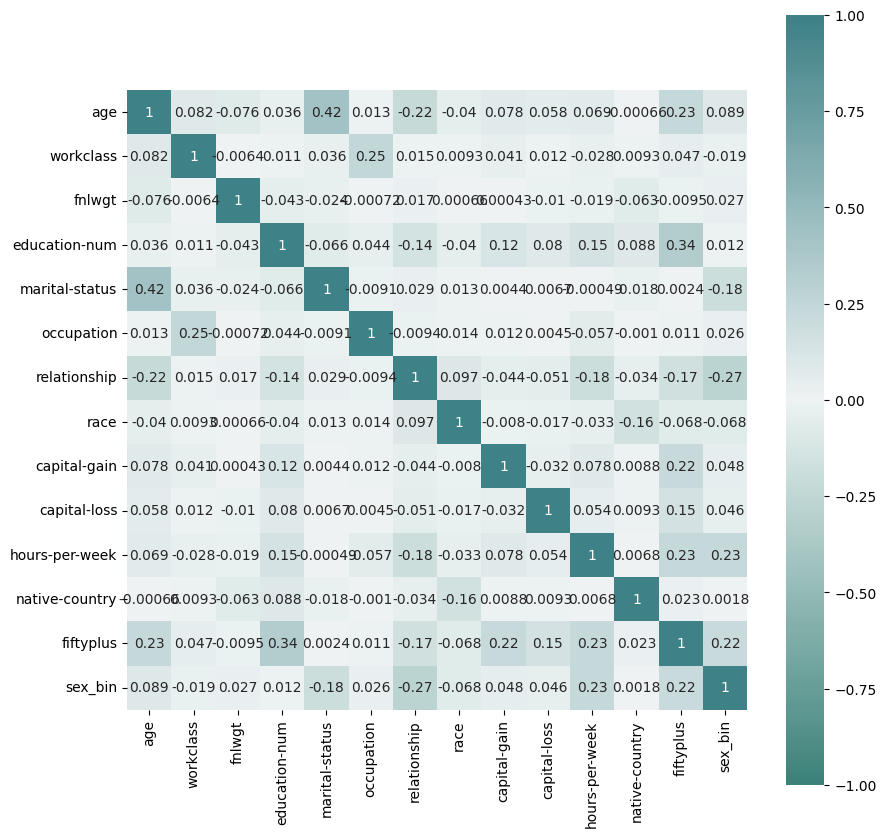

In [184]:
# sns.heatmap(df.corr(),annot=True)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))

correlation_= df.corr()

axis_corr = sns.heatmap(
correlation_, 
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(180, 2000, n=500),
square=True, annot=True
)

plt.show()

In [185]:
# dropping not co-related columns...
df.drop(columns=['fnlwgt','race','marital-status','native-country'], inplace=True)

In [186]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, df.columns != 'fiftyplus'] # all rows, column last ignore -1 ---- creating independent features dataset
y = df.iloc[:,df.columns == 'fiftyplus'] # only last column                 ----- creating dependet features dataset

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [189]:
X_train.shape, X_test.shape # total number of train dataset and test dataset

((21799, 9), (10738, 9))

In [196]:
from sklearn.datasets import make_classification # for data set
from sklearn.linear_model import LogisticRegression # for logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix # r2square, rscore

In [197]:
model = LogisticRegression() # object of logosticregression model

In [198]:
model.fit(X_train, y_train) # training ur model

f:\DataScience\projects\CensusIncomePredict\censusenv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\DataScience\projects\CensusIncomePredict\censusenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [199]:
model.score(X_train, y_train) # model is f=giving 88% accurate data on train dataseet - training accuracy

0.7991192256525529

In [200]:
y_pred = model.predict(X_test)

In [201]:
accuracy_score(y_test, y_pred) # testing accuracy

0.7923263177500466

In [202]:
confusion_matrix(y_test,y_pred)
#We can find the accuracy of the predicted result by interpreting the confusion matrix. 
# By above output, we can interpret that 143+149=  (Correct Output) and 12+26= 38(Incorrect Output).


array([[7801,  341],
       [1889,  707]], dtype=int64)